# Import Libraries

In [1]:
# The Python package for scientific computing
import numpy as np

# A module for handling data
import pandas as pd

# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The iris dataset from the sklearn library
from sklearn.datasets import load_iris

# The RadnomForest classifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier

# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, roc_auc_score

# Load The Data

In [2]:
# load the dataset from the csv file
data = pd.read_csv("glass_data.csv")

In [3]:
# check what is contained in the data variable
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
print('Shape of the data:', data.shape,'\n')

Shape of the data: (214, 11) 



# Data Preprocessing

In [5]:
# The first column, 'Id', is irrelevant to the model we want to train
data = data.drop(['Id'], axis=1)

In [6]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
# separate the data into the input features (everything without the last column) and the targets (the last column only)
inputs = data.iloc[:,:-1]
targets = data.iloc[:,-1]

In [11]:
print('Shape of the inputs:', inputs.shape,'\n')
print('Shape of the targets:', targets.shape,'\n')

Shape of the inputs: (213, 9) 

Shape of the targets: (213,) 



## Data Visualization

In [12]:
def dist_plot(X):
  plt.figure(figsize=(12,7))
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=data[X].value_counts().index, y=data[X].value_counts().values)
  plt.xticks(rotation='0', fontsize=14, fontweight='bold')
  plt.xlabel(X, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                  textcoords='offset points')
  # plt.grid()
  plt.show()

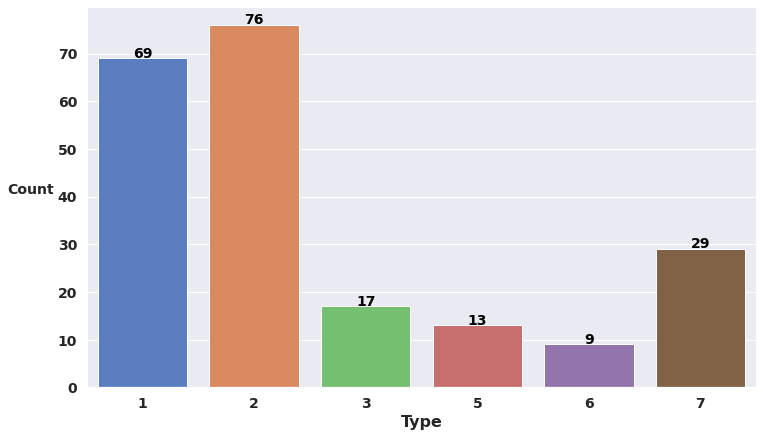

In [13]:
dist_plot("Type")

# Train test split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42, stratify = targets)

# The RandomForest Classifier Model

## Creating and Training the model

In [15]:
# Defining the tree classifier
clf = RandomForestClassifier(random_state=26)

In [16]:
# Training/creating the decision tree
clf = clf.fit(x_train, y_train)

In [17]:
#test the accuracy of model on training set
print('D_Tree Train Score is : ' , clf.score(x_train, y_train))

D_Tree Train Score is :  1.0


##Predicting a sample

In [18]:
# we can now predict a class of a datapoint
clf.predict([x_train.iloc[125]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([7])

## Make predictions on the test dataset

In [19]:
y_test_pred = clf.predict(x_test)
print('Shape of the y_test_pred:', y_test_pred.shape)

Shape of the y_test_pred: (43,)


## Construct the confusion matrix

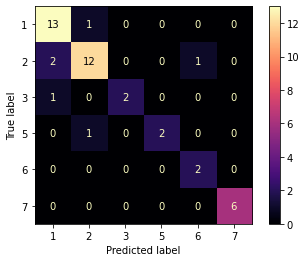

In [20]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

## classification report

In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.86      0.80      0.83        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.89      0.84      0.85        43
weighted avg       0.87      0.86      0.86        43

